# Instalacion Librerias

In [163]:
pip install textstat

In [164]:
pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 4.0 MB/s eta 0:00:00


# Importar Librerias

In [165]:
%matplotlib inline
from collections import Counter
from gensim.parsing.preprocessing import STOPWORDS
from gensim.utils import simple_preprocess
from nltk import bigrams, trigrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from scipy.spatial.distance import jaccard
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
from tqdm.auto import tqdm  # Importar tqdm para la barra de progreso
import gensim
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re
import seaborn as sns
import textstat
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Carga de Datos

In [2]:
data = pd.read_excel('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/Consolidado_respuestas_escribir_v2.xlsx')
data.head()

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,NaN
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,NaN
2,M,Una serie de tiempo es una colección de datos ...,NaN,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r..."
3,M,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,NaN
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...


In [3]:
df = data
df.head()

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,NaN
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,NaN
2,M,Una serie de tiempo es una colección de datos ...,NaN,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r..."
3,M,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,NaN
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...


In [4]:
df.count()

Genero                                        46
E1 - Examples of Time Series Analysis         44
E4 - Panel Data                               44
E6 - Decison Trees                            42
E8 - Ensemble Trees Overview                  38
E10 - REST-API                                45
E11 - Natural Language Processing Overview    16
dtype: int64

In [5]:
# Función para limpiar el texto
def limpiar_texto(texto):
    if pd.isnull(texto):
        return texto  # Retorna NaN tal como está
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'\s+', ' ', texto)  # Remover espacios extra y reemplazarlos por un espacio
    texto = re.sub(r'[^\w\s]', '', texto)  # Remover caracteres especiales excepto espacios
    texto = texto.strip()  # Remover espacios al inicio y al final
    return texto

# Aplicar la función de limpieza a cada columna de texto en el DataFrame, excepto a la primera columna 'Genero'
for columna in df.columns[1:]:  # Asume que la primera columna no necesita limpieza
    df[columna] = df[columna].apply(limpiar_texto)

df.head()


,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,M,one of the most valuable application of time s...,the main difference between panel data and tim...,decision tree are a model used by the analytic...,they are used to make a better prediction than...,es una forma de arquitectura de datos los micr...,NaN
1,F,análisis de series de tiempo usos el análisis...,series de tiempo vs datos en panel una serie d...,tipos de árboles de decisión y aplicaciones lo...,ensamblaje en machine learning los métodos de ...,microservicios el objetivo principal de la imp...,NaN
2,M,una serie de tiempo es una colección de datos ...,NaN,los arboles de decisión hacen parte de los alg...,ensemble methods is a machine learning techniq...,el enfoque tradicional para el diseño de aplic...,lexisnexis launched lexis analytics a legal re...
3,M,given that time series analysis allows to unde...,the difference between panel data and time ser...,decision trees algorithms are machine function...,ensemble methods in tree decision algorithms b...,microservices are defined as a type of softwar...,NaN
4,M,time series analysis is concerned with the stu...,a time series is represented by a variable or ...,decision trees are a popular supervised machin...,the ensemble method is a combination of severa...,a microservice is a type of information techno...,a commercial product which uses natural langua...


#Exercise 2.1

Analyze class homeworks


In [ ]:
# Función para calcular las métricas de texto
def analizar_texto(texto):
    if pd.isna(texto):
        return {"Frecuencia de Palabras": "N/A", "Bigramas más comunes": "N/A",
                "Longitud promedio de oraciones": "N/A", "Índice de Flesch-Kincaid": "N/A",
                "Diversidad léxica": "N/A"}

    tokens = word_tokenize(texto.lower())
    tokens_limpios = [t for t in tokens if t.isalpha() and t not in stopwords.words('english')]

    frecuencia_palabras = Counter(tokens_limpios).most_common(10)
    bigramas_comunes = Counter(list(bigrams(tokens_limpios))).most_common(5)
    trigramas_comunes = Counter(list(trigrams(tokens_limpios))).most_common(5)
    oraciones = sent_tokenize(texto)
    longitud_promedio_oraciones = sum(len(sent.split()) for sent in oraciones) / len(oraciones)
    flesch_kincaid = textstat.flesch_reading_ease(texto)
    diversidad_lexica = len(set(tokens_limpios)) / len(tokens_limpios) if tokens_limpios else "N/A"

    return {"Frecuencia de Palabras": frecuencia_palabras, "Bigramas más comunes": bigramas_comunes, "Trigramas más comunes": trigramas_comunes,
            "Longitud promedio de oraciones": longitud_promedio_oraciones, "Índice de Flesch-Kincaid": flesch_kincaid,
            "Diversidad léxica": diversidad_lexica}

# Aplicar la función de análisis a cada texto en cada columna (excepto la primera columna 'Genero')
for columna in df.columns[1:]:
    print(f"\nAnálisis para la columna: {columna}")
    for i, texto in enumerate(df[columna]):
        resultados = analizar_texto(texto)
        print(f"\nAlumno {i}:")
        for key, value in resultados.items():
            print(f"{key}: {value}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Análisis para la columna: E1 - Examples of Time Series Analysis

Alumno 0:
Frecuencia de Palabras: [('financial', 6), ('time', 5), ('stock', 5), ('price', 5), ('moving', 5), ('one', 4), ('series', 4), ('analysis', 4), ('information', 4), ('market', 4)]
Bigramas más comunes: [(('time', 'series'), 4), (('series', 'analysis'), 3), (('stock', 'prices'), 3), (('moving', 'average'), 3), (('stock', 'price'), 2)]
Trigramas más comunes: [(('time', 'series', 'analysis'), 3), (('moving', 'average', 'moving'), 2), (('average', 'moving', 'average'), 2), (('general', 'autoregressive', 'conditional'), 2), (('autoregressive', 'conditional', 'heteroscedasticity'), 2)]
Longitud promedio de oraciones: 299.0
Índice de Flesch-Kincaid: -232.02
Diversidad léxica: 0.5919540229885057

Alumno 1:
Frecuencia de Palabras: [('de', 35), ('el', 18), ('la', 14), ('los', 14), ('en', 13), ('se', 10), ('un', 9), ('que', 8), ('es', 7), ('por', 6)]
Bigramas más comunes: [(('de', 'tiempo'), 4), (('de', 'ventas'), 4), (('de

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


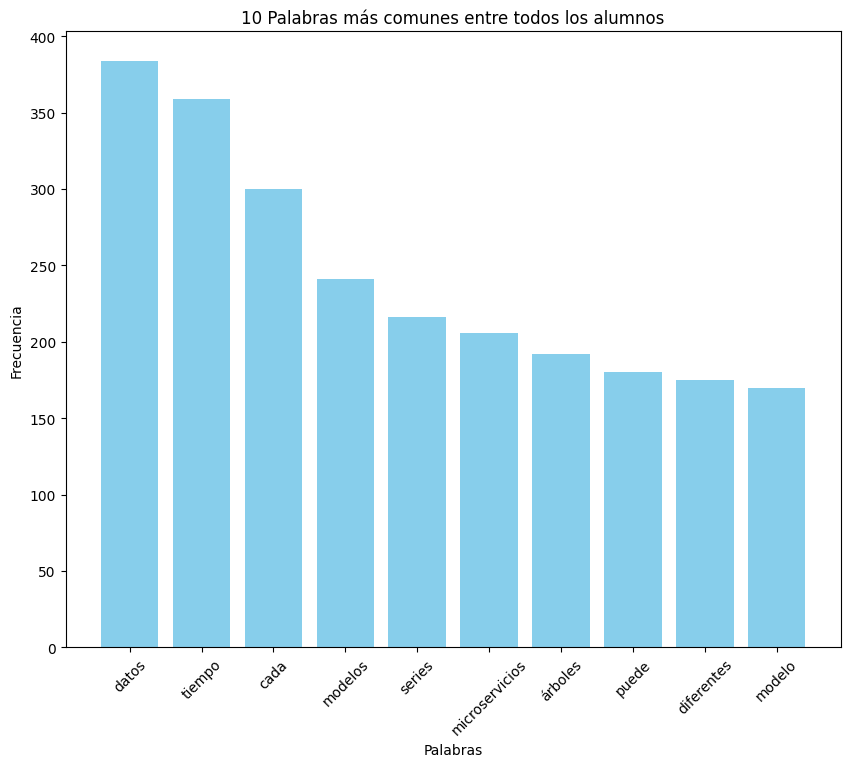

In [ ]:
# Combina stopwords de inglés y español
stop_words = set(stopwords.words('english') + stopwords.words('spanish'))

# Concatenar todos los textos de todos los alumnos en una gran cadena de texto
texto_total = ' '.join(str(x) for x in df[df.columns[1:]].fillna('').values.flatten())

# Tokenizar el texto y limpiarlo, omitiendo stopwords en ambos idiomas
tokens = word_tokenize(texto_total.lower())
tokens_limpios = [t for t in tokens if t.isalpha() and t not in stop_words]

# Calcular la frecuencia de palabras
frecuencia_palabras_total = Counter(tokens_limpios)

# Seleccionar las 10 palabras más comunes para la visualización
palabras_comunes = frecuencia_palabras_total.most_common(10)
palabras, frecuencias = zip(*palabras_comunes)

# Crear un gráfico de barras para las palabras más comunes
plt.figure(figsize=(10, 8))
plt.bar(palabras, frecuencias, color='skyblue')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('10 Palabras más comunes entre todos los alumnos')
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


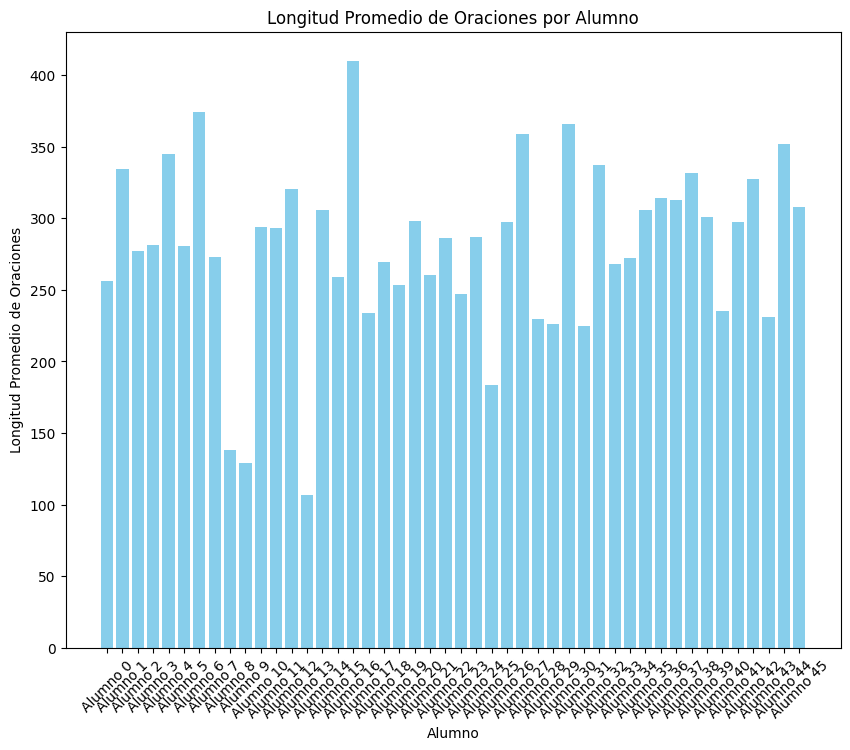

In [ ]:
# Función para calcular la longitud promedio de oraciones de un texto
def longitud_promedio_oraciones(texto):
    oraciones = sent_tokenize(texto)
    if len(oraciones) > 0:
        return np.mean([len(word_tokenize(sent)) for sent in oraciones])
    else:
        return 0

# Calcular la longitud promedio de oraciones para cada respuesta de texto de cada alumno
longitudes_promedio = []

for index, row in df.iterrows():
    longitudes = [longitud_promedio_oraciones(row[columna]) for columna in df.columns[1:] if pd.notnull(row[columna])]
    longitud_promedio_alumno = np.mean(longitudes) if len(longitudes) > 0 else 0
    longitudes_promedio.append(longitud_promedio_alumno)

# Agregar los resultados como una nueva columna en el DataFrame
df['Longitud Promedio Oraciones'] = longitudes_promedio

# Ahora, crear un gráfico de barras con la longitud promedio de oraciones por alumno
plt.figure(figsize=(10, 8))
plt.bar(df.index, df['Longitud Promedio Oraciones'], color='skyblue')
plt.xlabel('Alumno')
plt.ylabel('Longitud Promedio de Oraciones')
plt.title('Longitud Promedio de Oraciones por Alumno')
plt.xticks(df.index, labels=[f'Alumno {i}' for i in df.index], rotation=45)
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


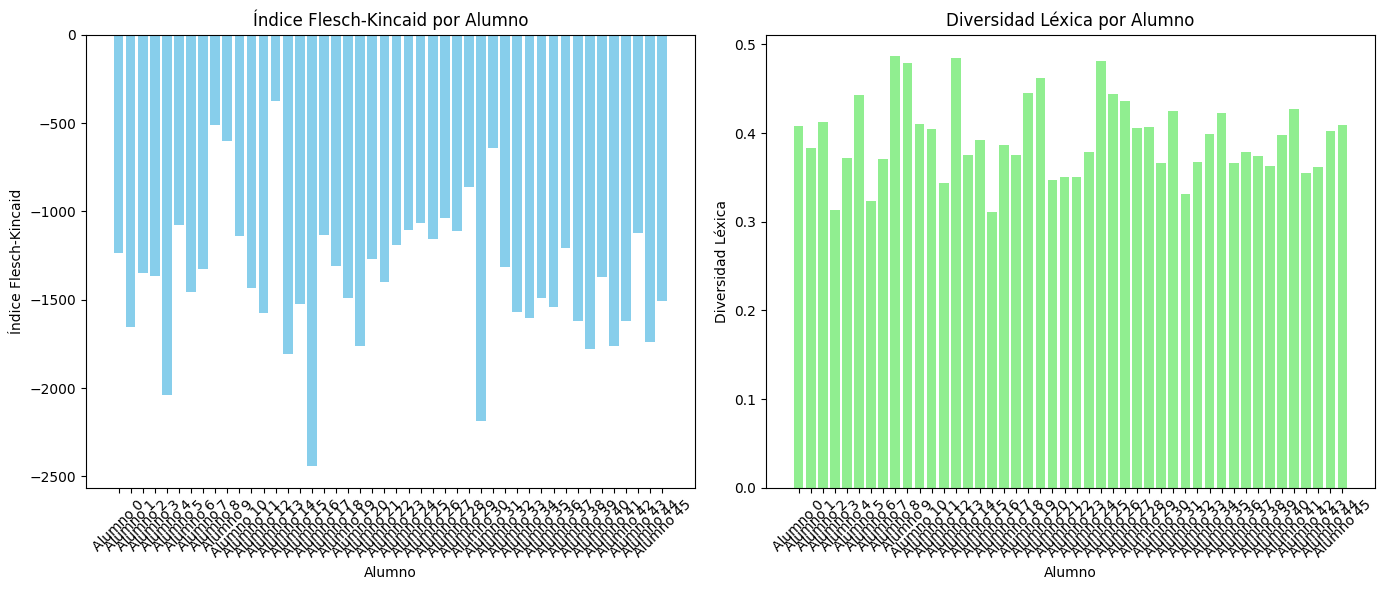

In [ ]:
# Asegurarse de que todos los textos sean strings antes de combinarlos
def combinar_textos(fila):
    textos = [str(fila[columna]) for columna in df.columns[1:] if pd.notnull(fila[columna])]
    return " ".join(textos)

# Recalcular el índice de Flesch-Kincaid y la diversidad léxica con la corrección
flesch_kincaid_scores = []
lexical_diversity_scores = []

for index, row in df.iterrows():
    combined_text = combinar_textos(row)

    # Índice de Flesch-Kincaid
    if combined_text.strip() == "":
        flesch_kincaid_score = np.nan
    else:
        flesch_kincaid_score = textstat.flesch_reading_ease(combined_text)
    flesch_kincaid_scores.append(flesch_kincaid_score)

    # Diversidad léxica
    tokens = word_tokenize(combined_text.lower())
    lexical_diversity_score = len(set(tokens)) / len(tokens) if tokens else np.nan
    lexical_diversity_scores.append(lexical_diversity_score)

df['Índice Flesch-Kincaid'] = flesch_kincaid_scores
df['Diversidad Léxica'] = lexical_diversity_scores

# Graficar
plt.figure(figsize=(14, 6))

# Índice de Flesch-Kincaid
plt.subplot(1, 2, 1)
plt.bar(range(len(df)), df['Índice Flesch-Kincaid'], color='skyblue')
plt.xlabel('Alumno')
plt.ylabel('Índice Flesch-Kincaid')
plt.title('Índice Flesch-Kincaid por Alumno')
plt.xticks(range(len(df)), labels=[f'Alumno {i}' for i in df.index], rotation=45)

# Diversidad Léxica
plt.subplot(1, 2, 2)
plt.bar(range(len(df)), df['Diversidad Léxica'], color='lightgreen')
plt.xlabel('Alumno')
plt.ylabel('Diversidad Léxica')
plt.title('Diversidad Léxica por Alumno')
plt.xticks(range(len(df)), labels=[f'Alumno {i}' for i in df.index], rotation=45)

plt.tight_layout()
plt.show()

# Exercise 2.2

Evaluate the similarities of the homeworks of the students.

At a homework level, then as a student level.

## Jaccard Similarity

El primer número (0) indica la fila de referencia para la comparación.
El segundo número (1) indica la fila con la que se está comparando la fila de referencia.
El tercer número (0.9859550561797753) representa la distancia de Jaccard entre las filas en la columna específica bajo análisis.

In [ ]:
# Función para calcular la similitud de Jaccard entre dos textos
def calcular_jaccard(texto1, texto2):
    # Verificar si alguno de los textos es NaN (representado como float en pandas)
    if pd.isnull(texto1) or pd.isnull(texto2):
        return np.nan  # Retornar NaN ya que no se puede calcular la similitud

    # Convertir cada texto en un conjunto de palabras
    conjunto1 = set(texto1.split())
    conjunto2 = set(texto2.split())
    # Calcular la intersección y la unión de los conjuntos
    interseccion = conjunto1.intersection(conjunto2)
    union = conjunto1.union(conjunto2)
    # Calcular la similitud de Jaccard
    if len(union) == 0:  # Evitar división por cero
        return np.nan
    similitud = len(interseccion) / len(union)
    # La distancia de Jaccard es 1 - similitud
    return 1 - similitud

# Aplicar la función para calcular la distancia de Jaccard para cada par de filas en cada columna
resultados_jaccard = pd.DataFrame()

for columna in df.columns[1:]:
    distancias = []
    for i in range(len(df)):
        for j in range(i+1, len(df)):
            distancia = calcular_jaccard(df[columna].iloc[i], df[columna].iloc[j])
            distancias.append((i, j, distancia))
    resultados_jaccard[columna] = pd.Series(distancias)

resultados_jaccard.head()


,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,"(0, 1, 0.9859550561797753)","(0, 1, 0.9689922480620154)","(0, 1, 0.9884393063583815)","(0, 1, 0.9815384615384616)","(0, 1, 0.8442028985507246)","(0, 1, nan)"
1,"(0, 2, 0.9912663755458515)","(0, 2, nan)","(0, 2, 0.9540983606557377)","(0, 2, 0.8233082706766918)","(0, 2, 0.7609561752988048)","(0, 2, nan)"
2,"(0, 3, 0.8157894736842105)","(0, 3, 0.7777777777777778)","(0, 3, 0.84)","(0, 3, 0.7611336032388664)","(0, 3, 0.9932432432432432)","(0, 3, nan)"
3,"(0, 4, 0.8534798534798534)","(0, 4, 0.8796992481203008)","(0, 4, 0.8490566037735849)","(0, 4, 0.7793594306049823)","(0, 4, 0.997093023255814)","(0, 4, nan)"
4,"(0, 5, 0.848375451263538)","(0, 5, 0.9574468085106383)","(0, 5, 0.9770491803278688)","(0, 5, nan)","(0, 5, 0.8517241379310345)","(0, 5, nan)"


In [ ]:
# Función para encontrar los pares de filas más similares en cada columna
def encontrar_mas_similares(df):
    resultados_similares = {}
    for columna in df.columns:
        # Ignorar valores NaN y ordenar por la distancia de Jaccard ascendente
        mas_similares = sorted([t for t in df[columna].dropna() if t], key=lambda x: x[2])
        # Tomar el par más similar (menor distancia) si la lista no está vacía
        if mas_similares:
            resultados_similares[columna] = mas_similares[0]
    return resultados_similares

# Llamada a la función y almacenamiento de resultados
pares_mas_similares = encontrar_mas_similares(resultados_jaccard)

# Imprimir los resultados
for columna, datos in pares_mas_similares.items():
    print(f"Columna: {columna}, Pares más similares: {datos[0]} y {datos[1]}, Distancia de Jaccard: {datos[2]}")


Columna: E1 - Examples of Time Series Analysis, Pares más similares: 0 y 3, Distancia de Jaccard: 0.8157894736842105
Columna: E4 - Panel Data, Pares más similares: 9 y 28, Distancia de Jaccard: 0.6790123456790124
Columna: E6 - Decison Trees, Pares más similares: 0 y 27, Distancia de Jaccard: 0.8148148148148149
Columna: E8 - Ensemble Trees Overview, Pares más similares: 0 y 3, Distancia de Jaccard: 0.7611336032388664
Columna: E10 - REST-API, Pares más similares: 0 y 2, Distancia de Jaccard: 0.7609561752988048
Columna: E11 - Natural Language Processing Overview, Pares más similares: 0 y 1, Distancia de Jaccard: nan


## Cosine Similarity

El resultado se interpreta de la siguiente manera:



1.   Primer número (0): Indica el índice de la primera fila en la comparación.
2.   Segundo número (1): Indica el índice de la segunda fila en la comparación
3.   Tercer número (0.002655453691764619): Representa la similitud coseno

La similitud coseno puede variar entre 0 y 1, donde:

Un valor cercano a 1 indica que los dos textos son muy similares en términos de orientación; es decir, contienen palabras (o términos) en proporciones similares, lo que los hace apuntar en direcciones similares en el espacio vectorial.
Un valor cercano a 0 sugiere que los dos textos son muy diferentes o tienen muy poca similitud en términos de las palabras que contienen.

In [ ]:
# Inicializar el vectorizador TF-IDF
vectorizador = TfidfVectorizer()

# Función para calcular la similitud coseno entre dos textos
def calcular_similitud_coseno(texto1, texto2):
    # Verificar si alguno de los textos es NaN
    if pd.isnull(texto1) or pd.isnull(texto2):
        return np.nan

    # Vectorizar los textos
    vectores = vectorizador.fit_transform([texto1, texto2])

    # Calcular la similitud coseno (devuelve una matriz de similitud)
    similitud = cosine_similarity(vectores[0:1], vectores[1:2])

    # Retornar el valor de similitud coseno
    return similitud[0][0]

# Crear un DataFrame vacío para guardar los resultados
resultados_similitud_coseno = pd.DataFrame()

# Calcular la similitud coseno para cada par de filas en cada columna
for columna in df.columns[1:]:
    similitudes = []
    for i in range(len(df)):
        for j in range(i+1, len(df)):
            similitud = calcular_similitud_coseno(df[columna].iloc[i], df[columna].iloc[j])
            similitudes.append((i, j, similitud))
    resultados_similitud_coseno[columna] = pd.Series(similitudes)

resultados_similitud_coseno.head()


,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,"(0, 1, 0.002655453691764619)","(0, 1, 0.01913081404014614)","(0, 1, 0.0023980604880299867)","(0, 1, 0.002446069371899367)","(0, 1, 0.6579744501659738)","(0, 1, nan)"
1,"(0, 2, 0.0034186808252135684)","(0, 2, nan)","(0, 2, 0.015812515928292914)","(0, 2, 0.5911444745737487)","(0, 2, 0.7820655775857381)","(0, 2, nan)"
2,"(0, 3, 0.5887743605762848)","(0, 3, 0.604572297789823)","(0, 3, 0.5443504707899296)","(0, 3, 0.6653657837747332)","(0, 3, 0.00031698576877052287)","(0, 3, nan)"
3,"(0, 4, 0.5973059419484846)","(0, 4, 0.5869167857028645)","(0, 4, 0.6707669653129812)","(0, 4, 0.660685157199568)","(0, 4, 0.0)","(0, 4, nan)"
4,"(0, 5, 0.37459876881342297)","(0, 5, 0.04532317770659498)","(0, 5, 0.006369711137804144)","(0, 5, nan)","(0, 5, 0.6224908144570641)","(0, 5, nan)"


In [ ]:
# Función para encontrar los pares de filas más similares en cada columna usando similitud coseno
def encontrar_mas_similares_coseno(df):
    resultados_similares = {}
    for columna in df.columns:
        # Ignorar valores NaN y ordenar por la similitud coseno descendente (para obtener los más similares)
        mas_similares = sorted([t for t in df[columna].dropna() if t], key=lambda x: x[2], reverse=True)
        # Tomar el par más similar (mayor similitud) si la lista no está vacía
        if mas_similares:
            resultados_similares[columna] = mas_similares[0]
    return resultados_similares

# Suponiendo que 'resultados_similitud_coseno' es tu DataFrame que contiene las similitudes coseno calculadas
pares_mas_similares_coseno = encontrar_mas_similares_coseno(resultados_similitud_coseno)

# Imprimir los resultados
for columna, datos in pares_mas_similares_coseno.items():
    print(f"Columna: {columna}, Pares más similares: {datos[0]} y {datos[1]}, Similitud Coseno: {datos[2]}")

Columna: E1 - Examples of Time Series Analysis, Pares más similares: 0 y 4, Similitud Coseno: 0.5973059419484846
Columna: E4 - Panel Data, Pares más similares: 0 y 2, Similitud Coseno: nan
Columna: E6 - Decison Trees, Pares más similares: 12 y 44, Similitud Coseno: 0.7459419935174679
Columna: E8 - Ensemble Trees Overview, Pares más similares: 0 y 3, Similitud Coseno: 0.6653657837747332
Columna: E10 - REST-API, Pares más similares: 2 y 41, Similitud Coseno: 0.8186992104896428
Columna: E11 - Natural Language Processing Overview, Pares más similares: 0 y 1, Similitud Coseno: nan


## Sentence Encoding + Cosine Similarity

Primer número (0): Representa el índice de la primera fila en la comparación. Esta es la fila de referencia desde la cual se está comparando la similitud.

Segundo número (1): Indica el índice de la segunda fila con la que se está comparando la primera fila. Esto significa que estás evaluando qué tan similares son el contenido textual de la fila 0 y la fila 1 para una columna específica.

Tercer número (0.25016516): Representa el valor de similitud coseno entre los vectores de características (embeddings) generados a partir de los textos de las filas 0 y 1. La similitud coseno varía entre 0 y 1, donde:




1.   Un valor de 1 indica que los vectores son idénticos en orientación; en términos prácticos, esto significaría que los textos son extremadamente similares o prácticamente iguales desde una perspectiva semántica.
2.   Un valor de 0 indicaría que los textos son completamente disímiles, es decir, no comparten ninguna similitud en términos de su contenido semántico.
3.   Un valor de 0.5 sugeriría una similitud moderada entre los textos.






In [ ]:
# Inicializar el modelo de Sentence Transformer
modelo = SentenceTransformer('all-MiniLM-L6-v2')

# Función para calcular la similitud coseno entre dos textos usando Sentence Encoding
def calcular_similitud_coseno_se(texto1, texto2):
    # Verificar si alguno de los textos es NaN
    if pd.isnull(texto1) or pd.isnull(texto2):
        return np.nan

    # Codificar los textos para obtener los vectores
    vectores = modelo.encode([texto1, texto2])

    # Calcular la similitud coseno (devuelve un valor de similitud)
    similitud = cosine_similarity([vectores[0]], [vectores[1]])[0][0]

    # Retornar el valor de similitud coseno
    return similitud

# Crear un DataFrame vacío para guardar los resultados de similitud
resultados_similitud_coseno_se = pd.DataFrame()

# Calcular la similitud coseno para cada par de filas en cada columna
for columna in tqdm(df.columns[1:], desc="Procesando columnas"):  # tqdm añade la barra de progreso
    similitudes = []
    # Usar tqdm dentro del bucle interno para mostrar el progreso en la comparación de pares de filas
    for i in tqdm(range(len(df)), desc=f"Comparando filas en {columna}", leave=False):
        for j in range(i+1, len(df)):
            similitud = calcular_similitud_coseno_se(df[columna].iloc[i], df[columna].iloc[j])
            similitudes.append((i, j, similitud))
    resultados_similitud_coseno_se[columna] = pd.Series(similitudes)

resultados_similitud_coseno_se.head()

Procesando columnas:   0%|          | 0/6 [00:00<?, ?it/s]

Comparando filas en E1 - Examples of Time Series Analysis:   0%|          | 0/46 [00:00<?, ?it/s]

Comparando filas en E4 - Panel Data:   0%|          | 0/46 [00:00<?, ?it/s]

Comparando filas en E6 - Decison Trees:   0%|          | 0/46 [00:00<?, ?it/s]

Comparando filas en E8 - Ensemble Trees Overview:   0%|          | 0/46 [00:00<?, ?it/s]

Comparando filas en E10 - REST-API:   0%|          | 0/46 [00:00<?, ?it/s]

Comparando filas en E11 - Natural Language Processing Overview:   0%|          | 0/46 [00:00<?, ?it/s]

,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,"(0, 1, 0.25016516)","(0, 1, 0.37562478)","(0, 1, 0.30236518)","(0, 1, 0.30016452)","(0, 1, 0.8260019)","(0, 1, nan)"
1,"(0, 2, 0.33182204)","(0, 2, nan)","(0, 2, 0.50356686)","(0, 2, 0.63813055)","(0, 2, 0.8770021)","(0, 2, nan)"
2,"(0, 3, 0.5796568)","(0, 3, 0.89136744)","(0, 3, 0.69823515)","(0, 3, 0.81273746)","(0, 3, 0.54204786)","(0, 3, nan)"
3,"(0, 4, 0.6470834)","(0, 4, 0.6777158)","(0, 4, 0.7706375)","(0, 4, 0.8277185)","(0, 4, 0.53115356)","(0, 4, nan)"
4,"(0, 5, 0.64120233)","(0, 5, 0.4085207)","(0, 5, 0.45517227)","(0, 5, nan)","(0, 5, 0.76026106)","(0, 5, nan)"


In [ ]:
# Ahora, aplicamos la función encontrar_mas_similares_coseno a los resultados calculados con Sentence Encoding
pares_mas_similares_coseno_se = encontrar_mas_similares_coseno(resultados_similitud_coseno_se)

# Imprimir los resultados
for columna, datos in pares_mas_similares_coseno_se.items():
    print(f"Columna: {columna}, Pares más similares: {datos[0]} y {datos[1]}, Similitud Coseno: {datos[2]}")


Columna: E1 - Examples of Time Series Analysis, Pares más similares: 13 y 17, Similitud Coseno: 0.7648166418075562
Columna: E4 - Panel Data, Pares más similares: 0 y 2, Similitud Coseno: nan
Columna: E6 - Decison Trees, Pares más similares: 0 y 4, Similitud Coseno: 0.7706375122070312
Columna: E8 - Ensemble Trees Overview, Pares más similares: 0 y 4, Similitud Coseno: 0.8277184963226318
Columna: E10 - REST-API, Pares más similares: 0 y 34, Similitud Coseno: 0.9189459085464478
Columna: E11 - Natural Language Processing Overview, Pares más similares: 0 y 1, Similitud Coseno: nan


# Exercise 2.3

Create a classifier to predict the gender of each student



In [33]:
df.head()

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview,Texto_Combinado
0,M,one of the most valuable application of time s...,the main difference between panel data and tim...,decision tree are a model used by the analytic...,they are used to make a better prediction than...,es una forma de arquitectura de datos los micr...,NaN,one of the most valuable application of time s...
1,F,análisis de series de tiempo usos el análisis...,series de tiempo vs datos en panel una serie d...,tipos de árboles de decisión y aplicaciones lo...,ensamblaje en machine learning los métodos de ...,microservicios el objetivo principal de la imp...,NaN,análisis de series de tiempo usos el análisis...
2,M,una serie de tiempo es una colección de datos ...,NaN,los arboles de decisión hacen parte de los alg...,ensemble methods is a machine learning techniq...,el enfoque tradicional para el diseño de aplic...,lexisnexis launched lexis analytics a legal re...,una serie de tiempo es una colección de datos ...
3,M,given that time series analysis allows to unde...,the difference between panel data and time ser...,decision trees algorithms are machine function...,ensemble methods in tree decision algorithms b...,microservices are defined as a type of softwar...,NaN,given that time series analysis allows to unde...
4,M,time series analysis is concerned with the stu...,a time series is represented by a variable or ...,decision trees are a popular supervised machin...,the ensemble method is a combination of severa...,a microservice is a type of information techno...,a commercial product which uses natural langua...,time series analysis is concerned with the stu...


In [54]:
# Combinar todas las columnas de texto en una sola cadena por fila
df['Texto_Combinado'] = df.drop('Genero', axis=1).fillna('').apply(lambda x: ' '.join(x), axis=1)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
# Combinando stopwords en inglés y español
combined_stopwords = stopwords.words('english') + stopwords.words('spanish')

# Inicialización del vectorizador TF-IDF con parámetros optimizados
vectorizador = TfidfVectorizer(
    stop_words=combined_stopwords,
    max_features=500,  # Ajusta según necesidades
    ngram_range=(1, 3),  # Utiliza tanto unigramas como bigramas
    min_df=3,  # Min. document frequency, ajusta según necesidades
    max_df=0.85  # Max. document frequency, ajusta según necesidades
)

# Aplicación del vectorizador al texto combinado
X = vectorizador.fit_transform(df['Texto_Combinado'].values)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [120]:
# Etiquetas (género)
y = df['Genero'].values

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.49, random_state=42)


In [121]:
# Entrenar un clasificador de regresión logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)


LogisticRegression()

In [122]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Mostrar la precisión y el reporte de clasificación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.8695652173913043
Reporte de Clasificación:
               precision    recall  f1-score   support

           F       0.00      0.00      0.00         3
           M       0.87      1.00      0.93        20

    accuracy                           0.87        23
   macro avg       0.43      0.50      0.47        23
weighted avg       0.76      0.87      0.81        23



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Exercise 2.4
Classify group members into different subgroups (minimum 3) according to a characteristic of your choice.

## Primer grupo

In [123]:
df['Texto_Combinado'] = df.drop('Genero', axis=1).fillna('').apply(lambda x: ' '.join(x), axis=1)

In [125]:
# Función para calcular la longitud promedio de las oraciones
def longitud_promedio_oraciones(texto):
    oraciones = sent_tokenize(texto)
    if len(oraciones) == 0:
        return 0
    return np.mean([len(word_tokenize(sent)) for sent in oraciones])

# Función para calcular la diversidad léxica
def diversidad_lexica(texto):
    palabras = word_tokenize(texto)
    if len(palabras) == 0:
        return 0
    return len(set(palabras)) / len(palabras)

# Aplicar las funciones a cada texto combinado
df['Longitud_Promedio_Oraciones'] = df['Texto_Combinado'].apply(longitud_promedio_oraciones)
df['Diversidad_Lexica'] = df['Texto_Combinado'].apply(diversidad_lexica)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [126]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las características para el clustering
X = df[['Longitud_Promedio_Oraciones', 'Diversidad_Lexica']]

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [127]:
from sklearn.cluster import KMeans

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [130]:
# Calcular la distribución de género por cluster
distribucion_genero = df.groupby(['Cluster', 'Genero']).size().unstack(fill_value=0)
print(distribucion_genero)


Genero   F   M
Cluster       
0        5  15
1        2   7
2        3  14


<ipython-input-133-da1d56e8ae0e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby('Cluster')['Longitud_Promedio_Oraciones', 'Diversidad_Lexica'].mean())


         Longitud_Promedio_Oraciones  Diversidad_Lexica
Cluster                                                
0                       15627.700000           0.036551
1                        9407.444444           0.041212
2                       18339.588235           0.032013


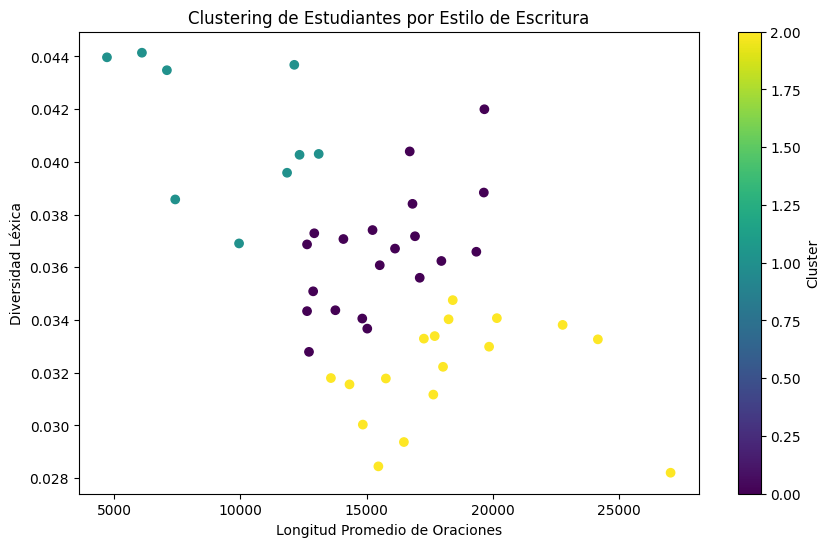

In [133]:
# Ver las estadísticas descriptivas por cluster
print(df.groupby('Cluster')['Longitud_Promedio_Oraciones', 'Diversidad_Lexica'].mean())

# Visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Longitud_Promedio_Oraciones'], df['Diversidad_Lexica'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Longitud Promedio de Oraciones')
plt.ylabel('Diversidad Léxica')
plt.title('Clustering de Estudiantes por Estilo de Escritura')
plt.colorbar(label='Cluster')
plt.show()


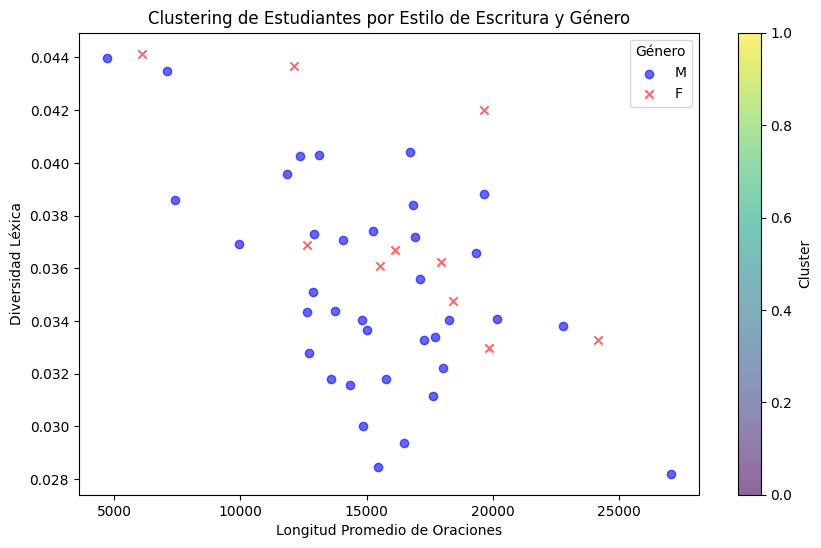

In [134]:
plt.figure(figsize=(10, 6))

# Mapear cada género a un color/marcador
colores_genero = {'M': 'blue', 'F': 'red'}  # Añade más colores si hay más géneros
marcadores_genero = {'M': 'o', 'F': 'x'}  # Añade más marcadores si hay más géneros

for genero in df['Genero'].unique():
    # Filtrar datos por género
    df_genero = df[df['Genero'] == genero]
    plt.scatter(df_genero['Longitud_Promedio_Oraciones'], df_genero['Diversidad_Lexica'], c=colores_genero[genero], label=genero, marker=marcadores_genero[genero], alpha=0.6)

plt.xlabel('Longitud Promedio de Oraciones')
plt.ylabel('Diversidad Léxica')
plt.title('Clustering de Estudiantes por Estilo de Escritura y Género')
plt.legend(title='Género')
plt.colorbar(label='Cluster')
plt.show()


## Grupo 2

In [135]:
# Función para preprocesar textos
def lematizar_y_preprocesar(texto):
    resultado = []
    for token in gensim.utils.simple_preprocess(texto):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            resultado.append(WordNetLemmatizer().lemmatize(token, pos='v'))
    return resultado

# Aplicar preprocesamiento a cada texto combinado
documentos_preprocesados = df['Texto_Combinado'].map(lematizar_y_preprocesar)


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [150]:
# Crear un diccionario a partir de los documentos preprocesados
diccionario = gensim.corpora.Dictionary(documentos_preprocesados)

# Filtrar tokens que aparecen en menos de 15 documentos o en más del 50% de los documentos
diccionario.filter_extremes(no_below=20, no_above=0.5)

# Crear el corpus que será utilizado por el modelo LDA
corpus = [diccionario.doc2bow(doc) for doc in documentos_preprocesados]


In [151]:
# Entrenar el modelo LDA
lda_modelo = gensim.models.LdaMulticore(corpus, num_topics=3, id2word=diccionario, passes=10, workers=2)

# Mostrar los tópicos identificados
for idx, topic in lda_modelo.print_topics(-1):
    print('Tópico: {} \nPalabras: {}\n'.format(idx, topic))


Tópico: 0 
Palabras: 0.467*"data" + 0.317*"tree" + 0.030*"cart" + 0.027*"final" + 0.015*"implementación" + 0.013*"capacidad" + 0.012*"error" + 0.012*"hacer" + 0.012*"enfoque" + 0.008*"ventajas"

Tópico: 1 
Palabras: 0.044*"periodos" + 0.044*"arboles" + 0.043*"demanda" + 0.042*"cuenta" + 0.038*"permiten" + 0.038*"cuales" + 0.037*"hacer" + 0.035*"producto" + 0.035*"debe" + 0.034*"enfoque"

Tópico: 2 
Palabras: 0.072*"ensamblaje" + 0.049*"otro" + 0.047*"método" + 0.046*"resultado" + 0.040*"posible" + 0.039*"obtener" + 0.035*"valores" + 0.034*"permiten" + 0.034*"dado" + 0.032*"caso"



In [152]:
# Asignar a cada documento el tópico más representativo
df['Tópico'] = [sorted(lda_modelo[corpus[i]], key=lambda tup: -1*tup[1])[0][0] for i in range(len(df))]


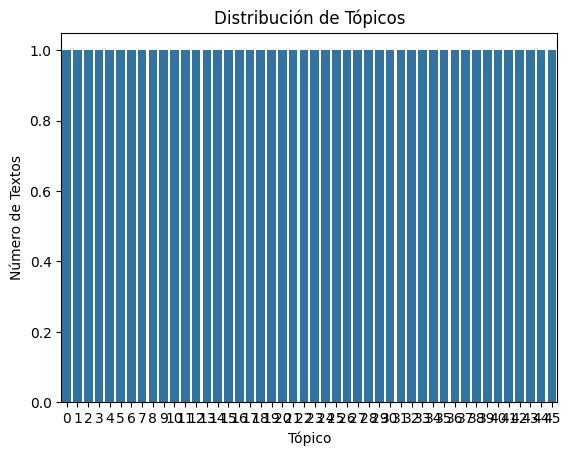

In [153]:
import seaborn as sns

sns.countplot(df['Tópico'])
plt.title('Distribución de Tópicos')
plt.xlabel('Tópico')
plt.ylabel('Número de Textos')
plt.show()


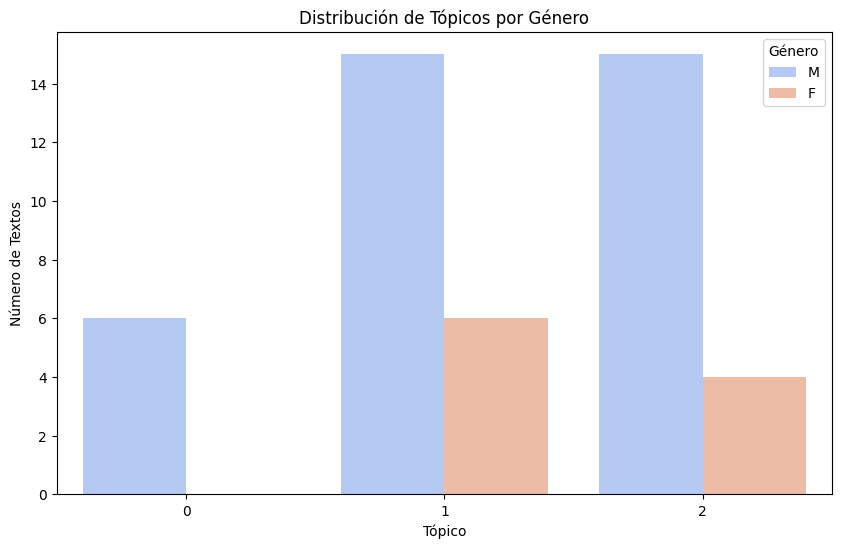

In [154]:
# Conteo de textos por género y tópico
conteo_topicos_genero = df.groupby(['Genero', 'Tópico']).size().reset_index(name='Conteo')

# Visualización de la distribución de tópicos por género
plt.figure(figsize=(10, 6))
sns.barplot(x='Tópico', y='Conteo', hue='Genero', data=conteo_topicos_genero, palette='coolwarm')
plt.title('Distribución de Tópicos por Género')
plt.xlabel('Tópico')
plt.ylabel('Número de Textos')
plt.legend(title='Género')
plt.show()


## Grupo 3

In [157]:
# Calcular el índice de Flesch-Kincaid para cada texto combinado
df['Flesch_Kincaid'] = df['Texto_Combinado'].apply(textstat.flesch_reading_ease)


In [158]:
# Dividir en 3 grupos usando cuantiles
df['Grupo_Complejidad'] = pd.qcut(df['Flesch_Kincaid'], 3, labels=["Alta", "Media", "Baja"])


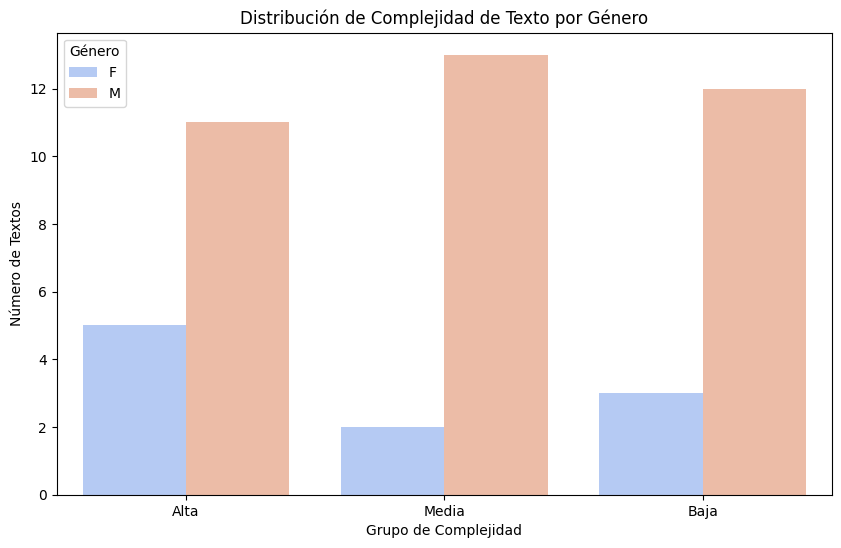

In [159]:
# Conteo de textos por género y grupo de complejidad
conteo_complejidad_genero = df.groupby(['Genero', 'Grupo_Complejidad']).size().reset_index(name='Conteo')

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x='Grupo_Complejidad', y='Conteo', hue='Genero', data=conteo_complejidad_genero, palette='coolwarm', order=["Alta", "Media", "Baja"])
plt.title('Distribución de Complejidad de Texto por Género')
plt.xlabel('Grupo de Complejidad')
plt.ylabel('Número de Textos')
plt.legend(title='Género')
plt.show()


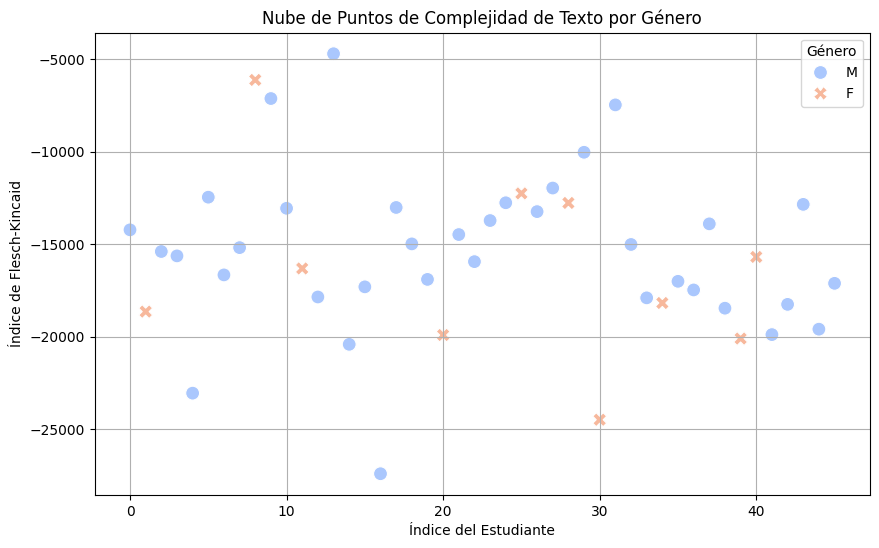

In [160]:
# Crear un scatter plot
plt.figure(figsize=(10, 6))

# Usar seaborn para una visualización mejorada
sns.scatterplot(data=df, x=df.index, y='Flesch_Kincaid', hue='Genero', style='Genero', palette='coolwarm', s=100)

plt.title('Nube de Puntos de Complejidad de Texto por Género')
plt.xlabel('Índice del Estudiante')
plt.ylabel('Índice de Flesch-Kincaid')
plt.legend(title='Género')
plt.grid(True)

plt.show()


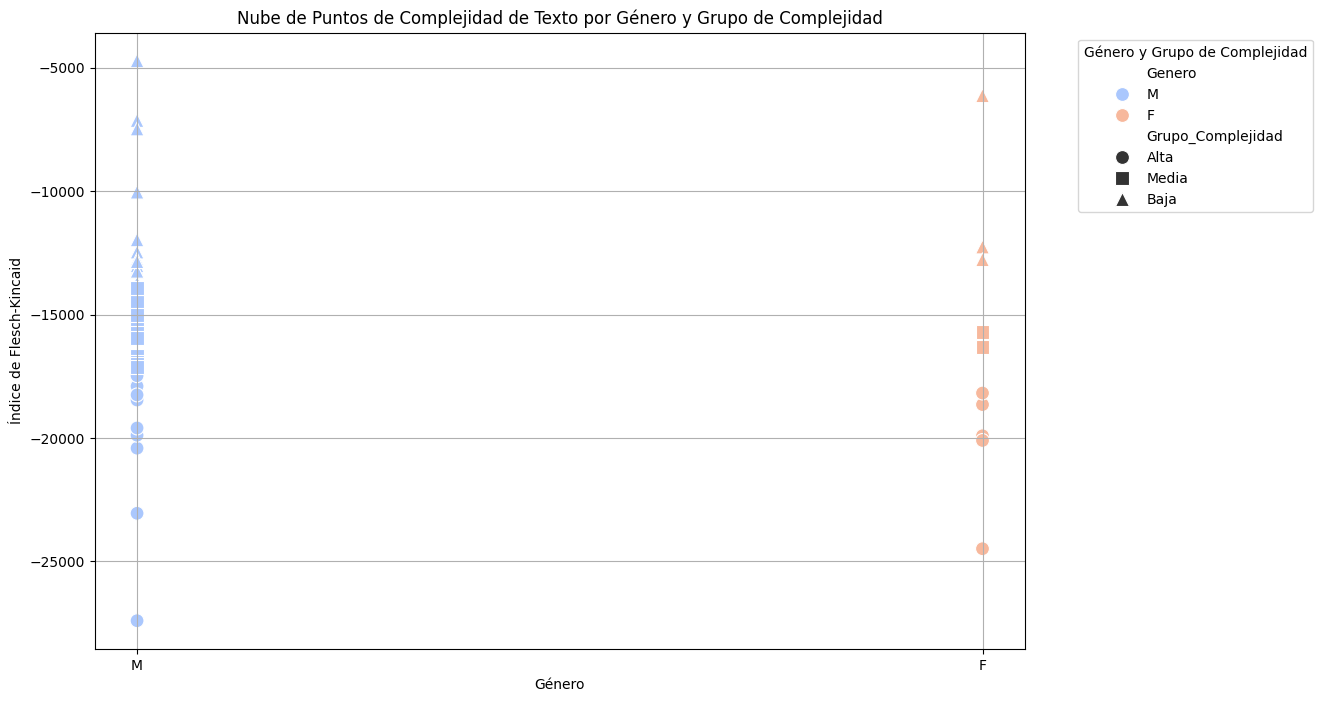

In [161]:
# Asegurándonos de que 'Grupo_Complejidad' está en el DataFrame, si no, lo añadimos nuevamente
df['Grupo_Complejidad'] = pd.qcut(df['Flesch_Kincaid'], 3, labels=["Alta", "Media", "Baja"])

# Crear un scatter plot con seaborn
plt.figure(figsize=(12, 8))

# Definir marcadores para cada grupo de complejidad
marcadores = {"Alta": "o", "Media": "s", "Baja": "^"}

# Usar seaborn para crear una nube de puntos con una leyenda que muestre la información de los marcadores
sns.scatterplot(data=df, x="Genero", y="Flesch_Kincaid", hue="Genero", style="Grupo_Complejidad", markers=marcadores, palette="coolwarm", s=100)

plt.title('Nube de Puntos de Complejidad de Texto por Género y Grupo de Complejidad')
plt.xlabel('Género')
plt.ylabel('Índice de Flesch-Kincaid')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Género y Grupo de Complejidad')

plt.grid(True)
plt.show()
